<a href="https://colab.research.google.com/github/edugalt/scaling/blob/master/notebooks/Notebook-covid19-Colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Notebook with the analysis of Covid-19 cases

This notebook visualizes the results for the analysis of the Covid-19 cases data stored inthe /data/ files. The pre-comipled rsults are stored in the folder [data/covid19/generated_files/](https://github.com/edugalt/scaling/tree/master/data/covid19/_generated_files)

Performed by [Jimena Espinoza](https://github.com/jimenaspi) as part of the Master of Complex Systems at [The University of Sydney](https://wwww.sydney.edu.au)

# Loading libraries to Colab and results

In [ ]:
!git clone https://github.com/edugalt/scaling

Cloning into 'scaling'...
remote: Enumerating objects: 900, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 900 (delta 1), reused 0 (delta 0), pack-reused 893
Receiving objects: 100% (900/900), 135.86 MiB | 23.58 MiB/s, done.
Resolving deltas: 100% (267/267), done.
Updating files: 100% (733/733), done.


In [ ]:
!pip3 install mpldatacursor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cd /content/scaling/notebooks/

/content/scaling/notebooks


In [ ]:
import pandas as pd
import sys
import numpy as np 
import pickle

%matplotlib notebook
from mpldatacursor import datacursor
from mpldatacursor import HighlightingDataCursor
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "w"

%matplotlib inline


In [ ]:
filepath = '../data/covid19/_generated_files/'

In [ ]:
def plot_results(country_name):
    '''country_name_options = ['Brazil','Chile','NSW','USA','USAbyStates']'''
    
    if country_name == 'Brazil':
        with open(filepath+'x_covid19_brazil.pickle', 'rb') as handle:
            x = pickle.load(handle)
        with open(filepath+'y_covid19_brazil.pickle', 'rb') as handle:
            y = pickle.load(handle)
        with open(filepath+'results_covid19_brazil.pickle', 'rb') as handle:
            results = pickle.load(handle)
        new_df = pd.read_csv(filepath+'covid19_brazil.csv')
        suptitle_name = country_name
        title_name = 'COVID-19 cases per city against population in log scale'
        
    elif country_name == 'Chile':
        with open(filepath+'x_covid19_chile.pickle', 'rb') as handle:
            x = pickle.load(handle)
        
        with open(filepath+'y_covid19_chile.pickle', 'rb') as handle:
            y = pickle.load(handle)

        with open(filepath+'results_covid19_chile.pickle', 'rb') as handle:
            results = pickle.load(handle)
        new_df = pd.read_csv(filepath+'covid19_chile.csv')
        suptitle_name = country_name
        title_name = 'COVID-19 cases per comuna against population in log scale'
        
    elif country_name == 'NSW':
        with open(filepath+'x_covid19_NSW.pickle', 'rb') as handle:
            x = pickle.load(handle)
        
        with open(filepath+'y_covid19_NSW.pickle', 'rb') as handle:
            y = pickle.load(handle)

        with open(filepath+'results_covid19_NSW.pickle', 'rb') as handle:
            results = pickle.load(handle)
        new_df = pd.read_csv(filepath+'covid19_NSW.csv')
        suptitle_name = country_name
        title_name = 'COVID-19 cases per SUA/SA2/LGA against population in log scale'
        
    elif country_name == 'USA':
        with open(filepath+'x_covid19_USA.pickle', 'rb') as handle:
            x = pickle.load(handle)

        with open(filepath+'y_covid19_USA.pickle', 'rb') as handle:
            y = pickle.load(handle)

        with open(filepath+'results_covid19_USA.pickle', 'rb') as handle:
            results = pickle.load(handle)
        new_df = pd.read_csv(filepath+'covid19_USA.csv')
        suptitle_name = country_name
        title_name = 'COVID-19 cases by county against population in log scale'
        
    fig, ax1 = plt.subplots(figsize=(6,6))
    plt.xscale("log")
    plt.yscale("log")
    
    names = new_df.loc[:, 'cities'].values
    i = 0
    for n in range(len(x)):   
        m = (new_df['population'] == x[i]) & (new_df['cases'] == y[i])
        name = new_df[m]['cities'].item()
        plt.plot(x[i], y[i], "o", ms=2,color="k", alpha = 0.3, label= name)
        i += 1

    plt.xlabel("Population")
    plt.ylabel("Cases")
    ax2 = ax1.twinx()
    ax1.get_shared_y_axes().join(ax1, ax2)
    
    plt.xscale("log")
    plt.yscale("log")

    #x* total y/ total x
    #Percapita = population of city[i] * (total cases)/(total population)
    slope, intercept = np.polyfit(np.log(x*(sum(y)/sum(x))), np.log(x), 1)
    ax2.plot(x, x*(sum(y)/sum(x)), 
             label =r'Percapita cases, $\beta={}$'+str(round(slope,2)), 
             alpha = 0.7, color = 'orange')
    
    y_y = np.exp(results['LS'] [2])*x**results['LS'][0]
    err_LS = results['LS'][1]
    ax2.plot(x, y_y,
             "-", ms=2,color="tomato",alpha = 0.7,
             label=r"Least Square fit, $\beta=$"+str(results['LS'][0])[:4]+r"$\pm$"
             +'{:.2f}'.format(err_LS))
    ax2.fill_between(x, (y_y - err_LS), 
                         (y_y + err_LS), color='tomato', alpha=.3)
    Y=np.sum(y)
    betaP=results['Pop']['params'][0]
    Z=np.sum(np.power(x,betaP))
    y_p = Y*x**betaP/Z
    err_P = results['Pop']['Beta +- error'][1]
    ax2.plot(x, y_p, "-", ms=2,color="limegreen", alpha = 0.7,
             label=r"Person's Model, $\beta=$"+str(betaP)[:4]+r"$\pm$"+'{:.2f}'.format(err_P))
    ax2.fill_between(x, (y_p - err_P), 
                         (y_p + err_P), color='limegreen', alpha=.3)
    ax2.set_yticklabels([])
    ax2.legend(loc=0)
    plt.suptitle(suptitle_name, fontsize=16)
    plt.title(title_name)
    
    plt.tight_layout()
    datacursor(formatter='{label}'.format, display='multiple', bbox=dict(fc='white'),
               draggable=True)
    plt.show()

# Data Analysis for different countries

## Brazil

<ipython-input-11-03ec502cebfc>:69: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax1, ax2)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

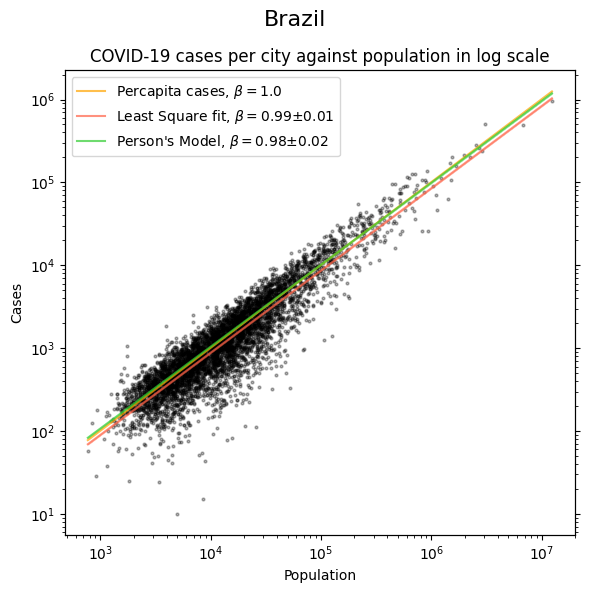

In [ ]:
plot_results('Brazil')

## Chile

<ipython-input-11-03ec502cebfc>:69: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax1, ax2)


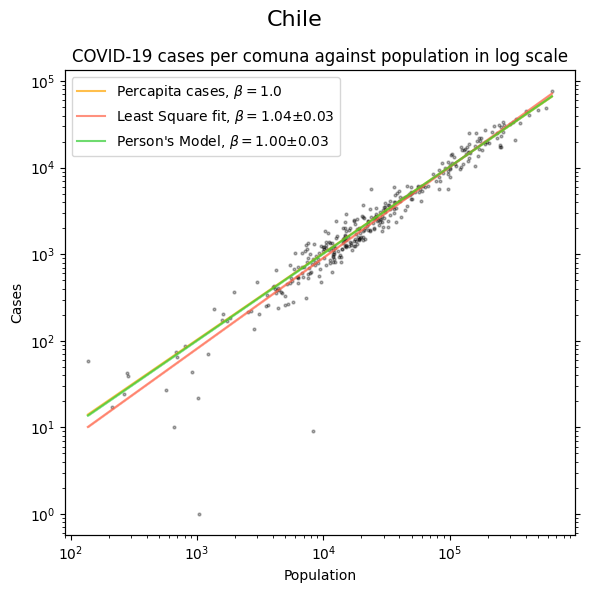

In [ ]:
plot_results('Chile')

## NSW

<ipython-input-11-03ec502cebfc>:69: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax1, ax2)


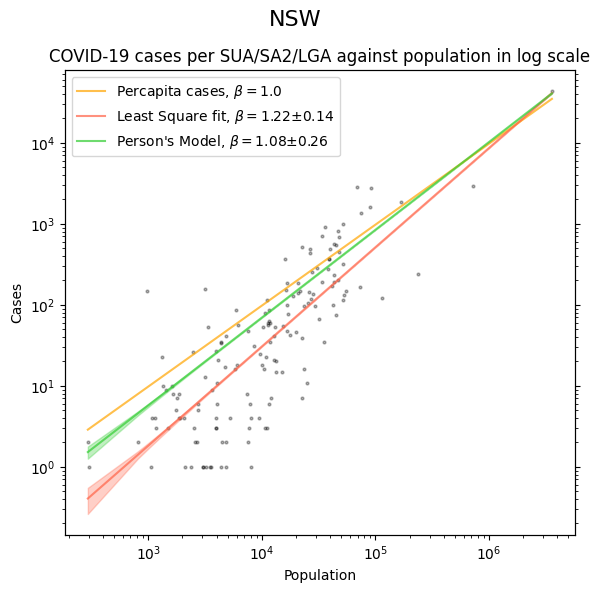

In [ ]:
plot_results('NSW')

## USA

<ipython-input-11-03ec502cebfc>:69: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax1, ax2)


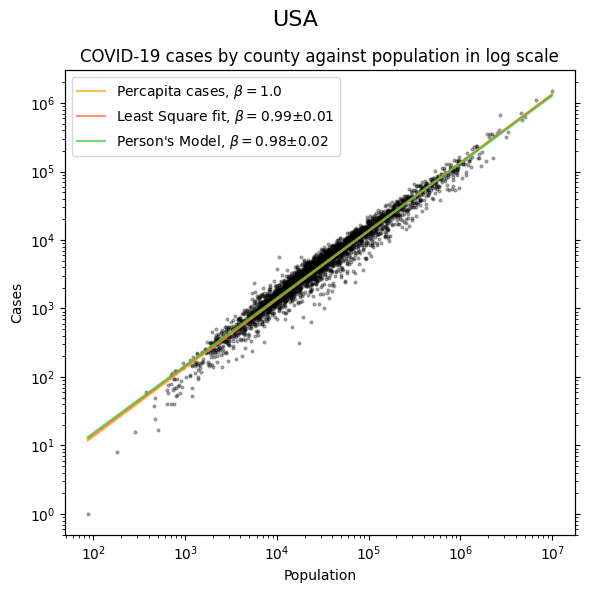

In [ ]:
plot_results('USA')

# Comparative analysis

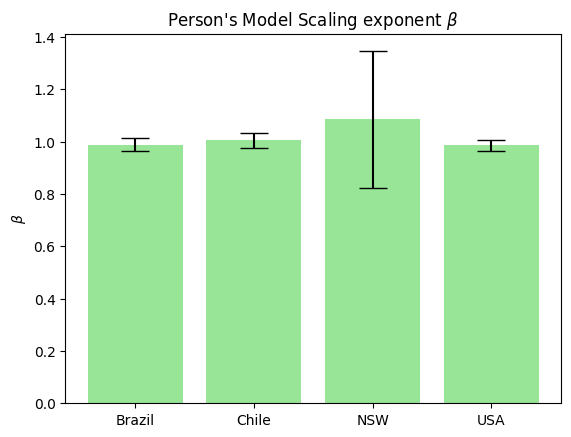

In [ ]:
import matplotlib.patches as mpatches
results = {}
color = {'Brazil':'limegreen', 'NSW':'goldenrod', 'USA':'tomato', 'Chile':'royalblue'}
with open(filepath+'results_covid19_brazil.pickle', 'rb') as handle:
    r = pickle.load(handle)
    results['Brazil'] = r
with open(filepath+'results_covid19_chile.pickle', 'rb') as handle:
    r = pickle.load(handle)
    results['Chile'] = r
with open(filepath+'results_covid19_NSW.pickle', 'rb') as handle:
    r = pickle.load(handle)
    results['NSW'] = r
with open(filepath+'results_covid19_USA.pickle', 'rb') as handle:
    r = pickle.load(handle) 
    results['USA'] = r


for name, r in results.items():
    # Visualize the result
    beta_pop = r['Pop']['Beta +- error'][0]
    err_pop = r['Pop']['Beta +- error'][1]
    beta_ls = r['LS'][0]
    err_ls = r['LS'][1]
    plt.bar(name, beta_pop, yerr=err_pop, align='center', alpha=0.5, 
            ecolor='black', capsize=10, color='limegreen')
    
    plt.ylabel(r'$\beta$')
    plt.title(r"Person's Model Scaling exponent $\beta$")
    plt.savefig('beta_errors_pop', dpi = 1000)

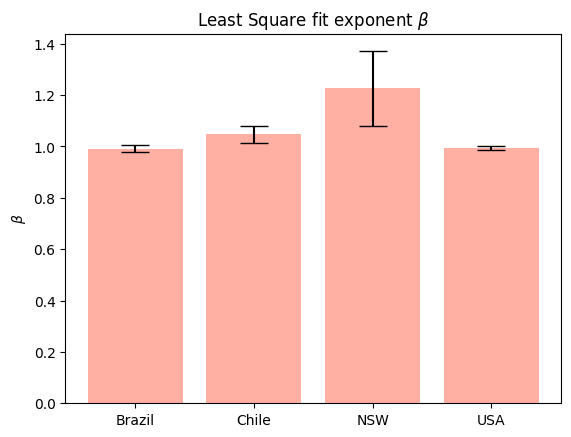

In [ ]:
for name, r in results.items():
    # Visualize the result
    beta_pop = r['Pop']['Beta +- error'][0]
    err_pop = r['Pop']['Beta +- error'][1]
    beta_ls = r['LS'][0]
    err_ls = r['LS'][1]
    plt.bar(name, beta_ls, yerr=err_ls, align='center', alpha=0.5, 
            ecolor='black', capsize=10, color='tomato')
    plt.ylabel(r'$\beta$')
    plt.title(r"Least Square fit exponent $\beta$")
    plt.savefig('beta_errors_Least Square', dpi = 1000)

In [ ]:
saving_path = '../data/covid19/_generated_files/'
with open(saving_path+'list_delays_Brazil.pikle', 'rb') as handle:
    list_delays = pickle.load(handle)
sorted(list_delays);

In [ ]:
#Pop
pop_beta = {}
pop_error = {}
#LS
ls_beta = {}
ls_error = {}
for n in sorted(list_delays):
    try:
        with open('../data/covid19/_generated_files/Brazil_by_dates/_results/results_Brazil_'+str(n)+'.pickle', 'rb') as handle: 
            results = pickle.load(handle)
    except:
        break
    (beta, error) =results['Pop']['Beta +- error']
    pop_beta[n] = beta
    pop_error[n] = error
    k =results['LS']
    ls_beta[n] = k[0]
    ls_error[n] = k[1]

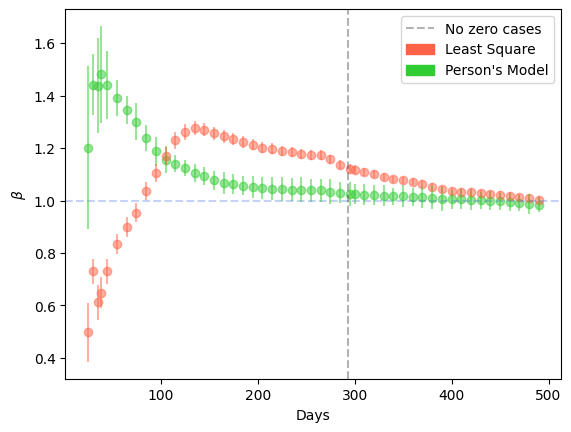

In [ ]:
i = 0
n = sorted(list_delays)

handles_x = []
fig, ax1 = plt.subplots()

ax1.axhline(y=1, color='royalblue', alpha = 0.3, linestyle='--')
ax1.axvline(x=293, color='black', alpha = 0.3, linestyle='--', label='No zero cases')
handles_x, labels = plt.gca().get_legend_handles_labels()
red_patch = mpatches.Patch(color='tomato', label='Least Square')
green_patch = mpatches.Patch(color='limegreen', label="Person's Model")

for name, value in pop_beta.items():
    x = n[i]
    y = pop_beta[name]
    
    yerr =pop_error[name]
    ax1.scatter(x, y, label=name, color="limegreen", alpha = 0.5)
    ax1.errorbar(x, y, yerr=yerr, color="limegreen", alpha = 0.5, label=name)
    i += 1

handles_x.append(red_patch)
handles_x.append(green_patch)

i = 0
for name, value in ls_beta.items():
    x = n[i] #should be days and annotate number of cases
    y = ls_beta[name]
    yerr =ls_error[name]
    ax1.scatter(x, y, label=name, color="tomato", alpha = 0.5)
    ax1.errorbar(x, y, yerr=yerr, color="tomato", alpha = 0.5)
    i += 1

ax1.legend(handles=handles_x, loc='upper right')
ax1.set_ylabel(r"$\beta$") 
plt.xlabel("Days")
plt.savefig('../data/covid19/_generated_files/Brazil_by_dates/_results/Betas_Brazil', dpi = 1000)
plt.show()